# Iris Species Classification

# Introduction

- Iris dataset is the Hello World for the Data Science, so if you have started your career in Data Science and Machine Learning you will be practicing basic ML algorithms on this famous dataset. Iris dataset contains five columns such as Petal Length, Petal Width, Sepal Length, Sepal Width and Species Type.

- Iris is a flowering plant, the researchers have measured various features of the different iris flowers and recorded digitally

- The iris dataset contains the following data

    a. 50 samples of 3 different species of iris (150 samples total)

    b. There are 50 observations of each species for a total of 150 observations with 4 features each (sepal length, sepal      width, petal length, petal width).
    

- Measurements: sepal length, sepal width, petal length, petal width

- The format for the data: (sepal length, sepal width, petal length, petal width)
    
The 4 features are
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm

The target class
The flower species type is the target class and it having 3 types

- Setosa
- Versicolor
- Virginica

# Importing the Necessary Libraries

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score

# Reading the input file

Storing the csv file in dataframe named data and printing the dataframe.

In [9]:
data = pd.read_csv('Iris.csv')
data 

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Lets take a look at the information in our dataset

In [10]:
#There are 150 rows and 6 columns total.
data.shape

(150, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Looking at the statistics of our dataset

In [12]:
data.describe()

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Lets check for any missing values in the dataset

In [13]:
print("Total number of missing values: ")
print(30 * "-")
print(data.isna().sum())
print(30 * "-")
print("Total missing values are:", data.isna().sum().sum())
print(30 * "-")

Total number of missing values: 
------------------------------
Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
------------------------------
Total missing values are: 0
------------------------------


Removing the Id column from our dataset as it is not needed to peform EDA (Exploratory Data Analysis).

In [14]:
data.drop(columns = ['Id'], axis = 1, inplace = True)
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Taking a look at the different types of Species and counting the total number of unique values so that we can look the class distribution of our dataset.

In [15]:
print("The different Species in the dataset are: ", data['species'].unique())
print("The total number of unique species are: ", data['species'].unique())

The different Species in the dataset are:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
The total number of unique species are:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# Exploratory Data Analysis

Trying to visualize the distribution of the Species in our dataset to see if the classes are balanced.

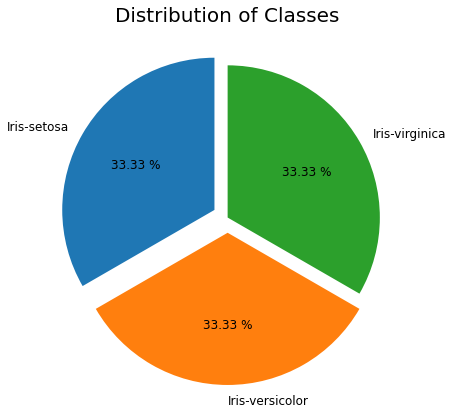

In [16]:
count_list = [(data.species == 'Iris-setosa').sum(), (data.species == 'Iris-versicolor').sum(), (data.species == 'Iris-virginica').sum()]
label_list = list(data['species'].unique())
plt.figure(figsize = (10, 7))
plt.pie(count_list, labels = label_list, autopct = "%.2f %%", startangle = 90, explode = (0.1, 0.1, 0.0), textprops = {'fontsize': 12})
plt.title('Distribution of Classes', fontsize = 20)
plt.show()

The classes are equally balanced. Now, let us look at the count of each flower type in our dataset.

In [17]:
print("The distribution of the classes is :\n", data['species'].value_counts(), sep = "")

The distribution of the classes is :
Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64


# Univariate Analysis

Univariate analysis is the simplest form of analyzing data. We only take a single variable into consideration and try to find relations based on that.

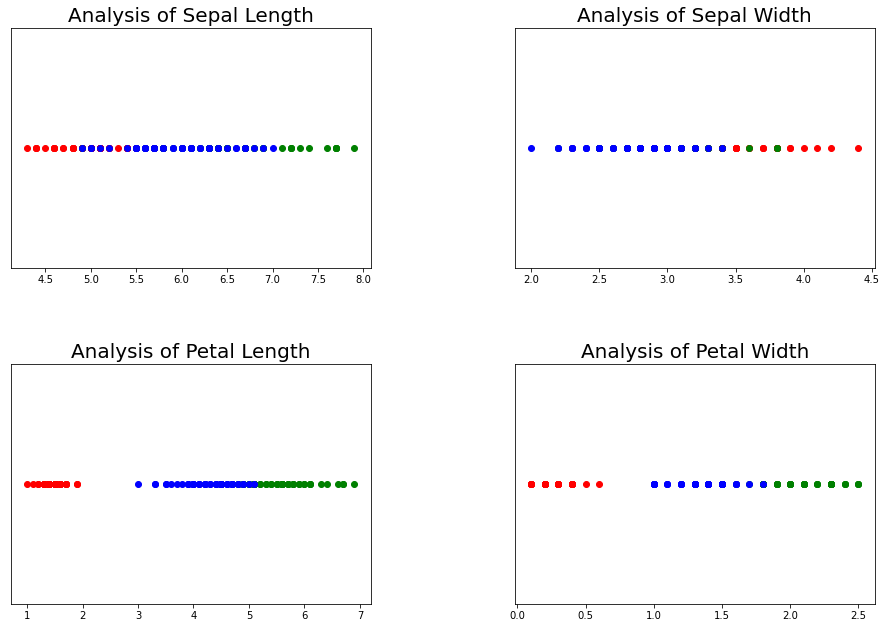

In [18]:
fig = plt.figure(figsize = (15, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot((data[data['species'] == 'Iris-setosa'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['sepal_length']), 'ro')
ax1.plot((data[data['species'] == 'Iris-virginica'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['sepal_length']), 'go')
ax1.plot((data[data['species'] == 'Iris-versicolor'])['sepal_length'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['sepal_length']), 'bo')
ax1.set_title('Analysis of Sepal Length', size = 20)
ax1.get_yaxis().set_visible(False)

ax2.plot((data[data['species'] == 'Iris-setosa'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['sepal_width']), 'ro')
ax2.plot((data[data['species'] == 'Iris-virginica'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['sepal_width']), 'go')
ax2.plot((data[data['species'] == 'Iris-versicolor'])['sepal_width'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['sepal_width']), 'bo')

ax2.set_title('Analysis of Sepal Width', size = 20)
ax2.get_yaxis().set_visible(False)

ax3.plot((data[data['species'] == 'Iris-setosa'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['petal_length']), 'ro')
ax3.plot((data[data['species'] == 'Iris-virginica'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['petal_length']), 'go')
ax3.plot((data[data['species'] == 'Iris-versicolor'])['petal_length'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['petal_length']), 'bo')
ax3.set_title('Analysis of Petal Length', size = 20)
ax3.get_yaxis().set_visible(False)

ax4.plot((data[data['species'] == 'Iris-setosa'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-setosa'])['petal_width']), 'ro')
ax4.plot((data[data['species'] == 'Iris-virginica'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-virginica'])['petal_width']), 'go')
ax4.plot((data[data['species'] == 'Iris-versicolor'])['petal_width'], np.zeros_like((data[data['species'] == 'Iris-versicolor'])['petal_width']), 'bo')
ax4.set_title('Analysis of Petal Width', size = 20)
ax4.get_yaxis().set_visible(False)

plt.subplots_adjust(left = 0.1,
                    bottom = 0.1, 
                    right = 0.9, 
                    top = 0.9, 
                    wspace = 0.4, 
                    hspace = 0.4)
plt.show()

Observations:

1. sepal_length: Iris-setosa has the smallest sepal length. We can see an outlier (red dot) in the graph. Iris-versicolor has a sepal length of about 5 cm to 7 cm. Iris-virginica has the largest sepal length (above 7 cm).

2. sepal_width: Iris-versicolor has the smallest sepal width. The distinction between setosa and virginica is not so prominent in the range of 3.5 cm to 4 cm. However for a sepal width equal to or greater than 4 cm all the flowers belong to the Iris-setosa species.

3. petal_length: Iris-setosa has the smallest petal length. The length of the petals do not exceed 2 cm. For Iris-versicolor the petal length is in the range of 3 cm to 5 cm. Iris-virginica has the largest petal length (5 cm or greater).

4. petal_width: Iris-setosa has the smallest petal width. Iris-versicolor has a petal length from 1 cm to slightly less than 2 cm. Iris-virginica has a petal width that is approximately greater than 1.8 cm.

Boxplots are a standardized way of displaying the distribution of data.

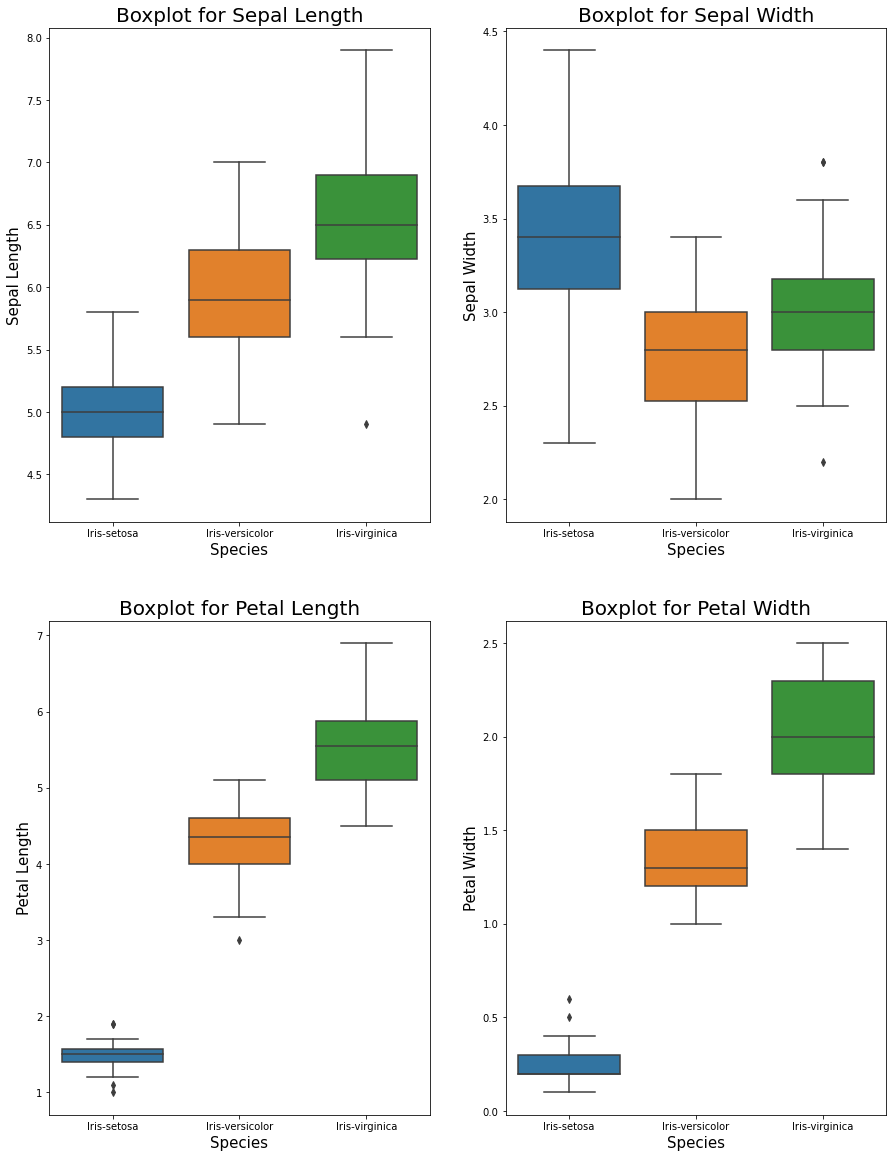

In [19]:
plt.figure(figsize=(15, 20))

def create_boxplot(feature):
    sns.boxplot(data = data, x = 'species', y = feature)
    if(feature == 'sepal_length'):
        feature = 'Sepal Length'
    if(feature == 'sepal_width'):
        feature = 'Sepal Width'
    if(feature == 'petal_length'):
        feature = 'Petal Length'
    if(feature == 'petal_width'):
        feature = 'Petal Width'
    plt.title('Boxplot for ' + feature, fontsize = 20)
    plt.xlabel('Species', fontsize = 15)
    plt.ylabel(feature, fontsize = 15)
      
plt.subplot(221)
create_boxplot('sepal_length')
  
plt.subplot(222)
create_boxplot('sepal_width')
  
plt.subplot(223)
create_boxplot('petal_length')

plt.subplot(224)
create_boxplot('petal_width')
  
plt.show()

Observations:

1. sepal_length: The median value for sepal length is the least for Iris-setosa and the most for Iris-virginica.
2. sepal_width: The median value for sepal width is the least for Iris-versicolor and the largest for Iris-setosa. Based on the sepal width of the flowers it might be tough to differentiate between the 3 species.
3. petal_length: Visually it is very evident that Iris-setosa has the least petal length. Even though there are a few outliers all of them are less than 2 cm. Iris-versicolor has the second largest median petal length, whereas Iris-virginica has the largest median petal length.
4. petal_width: Similar to the petal lengths of the species, we can see that Iris-setosa has the lowest median petal width, whereas Iris-virginica has the largest median petal width.

# Bivariate Analysis

Bivariate analysis is a form of statistical analysis. It involves the analysis of two variables for the purpose of determining the relationship between them.

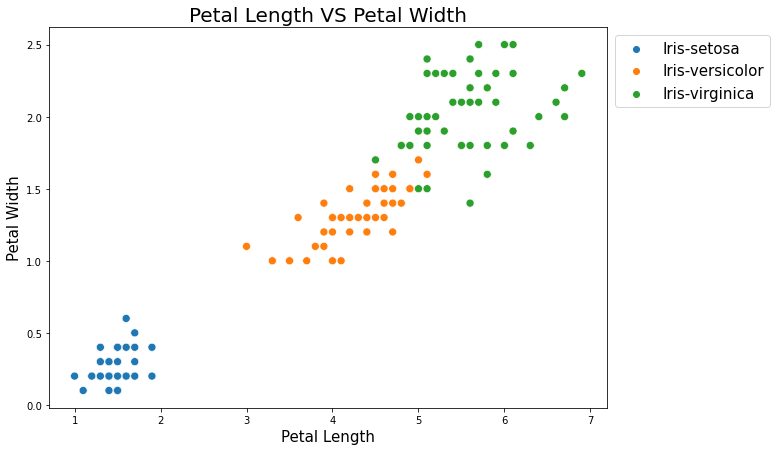

In [20]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'petal_length', y = 'petal_width', hue = 'species', data = data, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Petal Length VS Petal Width', fontsize = 20)
plt.xlabel('Petal Length', fontsize = 15)
plt.ylabel('Petal Width', fontsize = 15)
plt.show()

We can see that the petal length and petal width is the least for Iris-setosa. The petal width and length for Iris-versicolor lies in an intermediate range, between that of setosa and virginica. Iris-virginica has the largest petal length and width. A few outliers exist in the case of both versicolor and virginica.

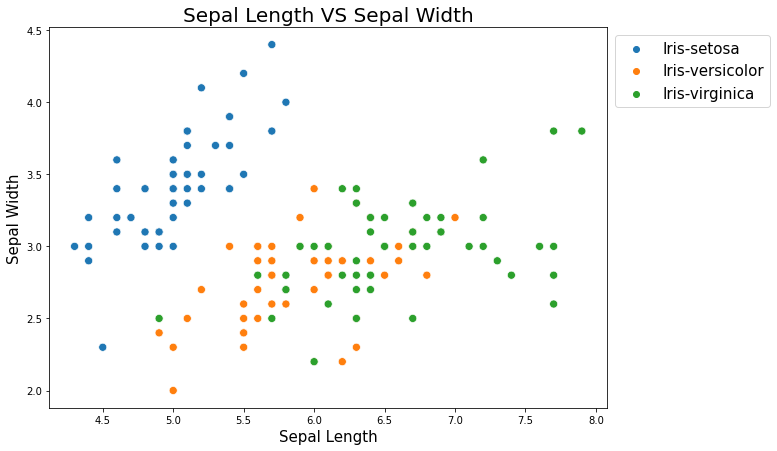

In [21]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', hue = 'species', data = data, s = 65)
plt.legend(bbox_to_anchor = (1, 1), loc = 2, fontsize = 15)
plt.title('Sepal Length VS Sepal Width', fontsize = 20)
plt.xlabel('Sepal Length', fontsize = 15)
plt.ylabel('Sepal Width', fontsize = 15)
plt.show()

We can observe that Iris-setosa has a relatively lower sepal length (as compared to versicolor or virginica). Iris-setosa has a large sepal width. It is hard to distinguish between versicolor and virginica based on sepal length and width.

# Multivariate Analysis

It refers to an analysis involving multiple dependent variables resulting in one outcome.

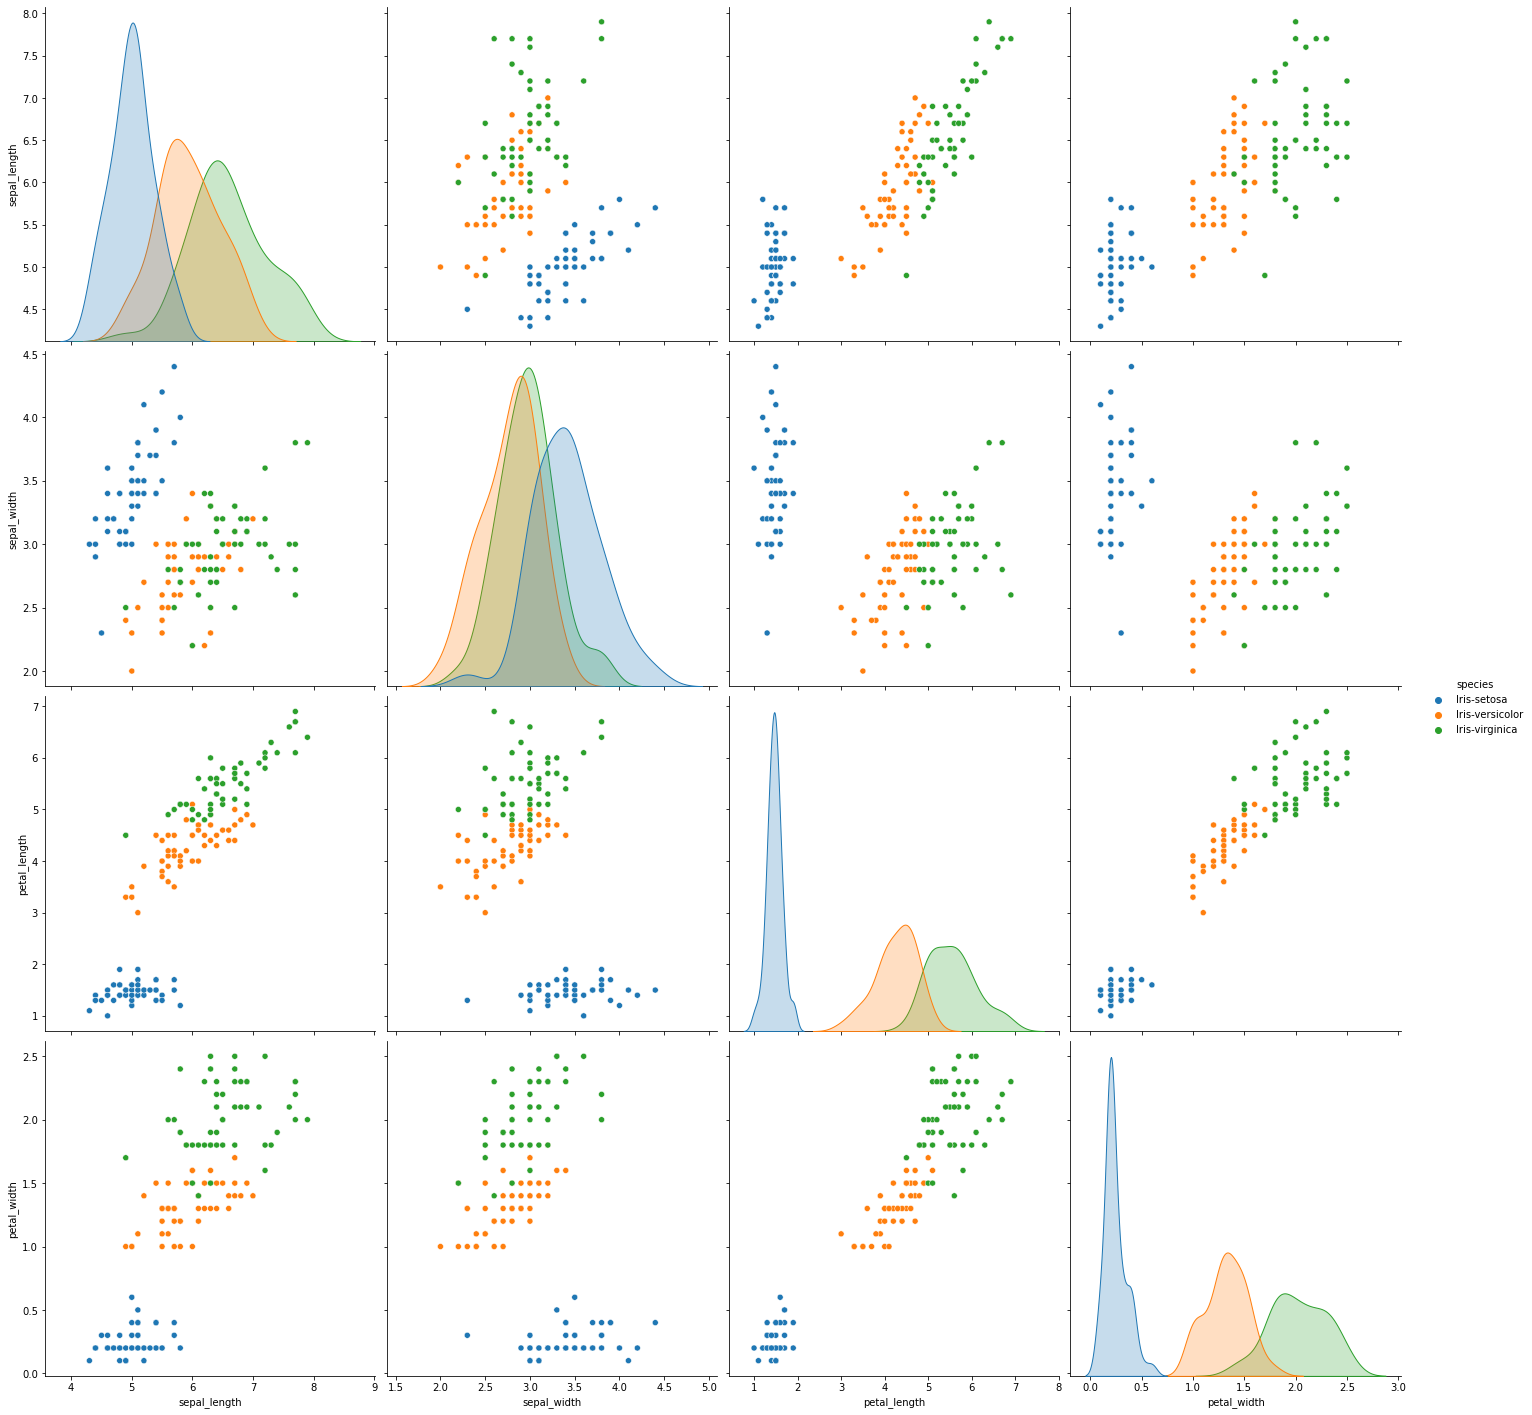

In [22]:
sns.pairplot(data, hue = 'species', height = 5)
plt.show()

# 3D Visualization

3D scatter plots are used to plot data points on three axes in the attempt to show the relationship between three variables. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X, Y, and Z axes.

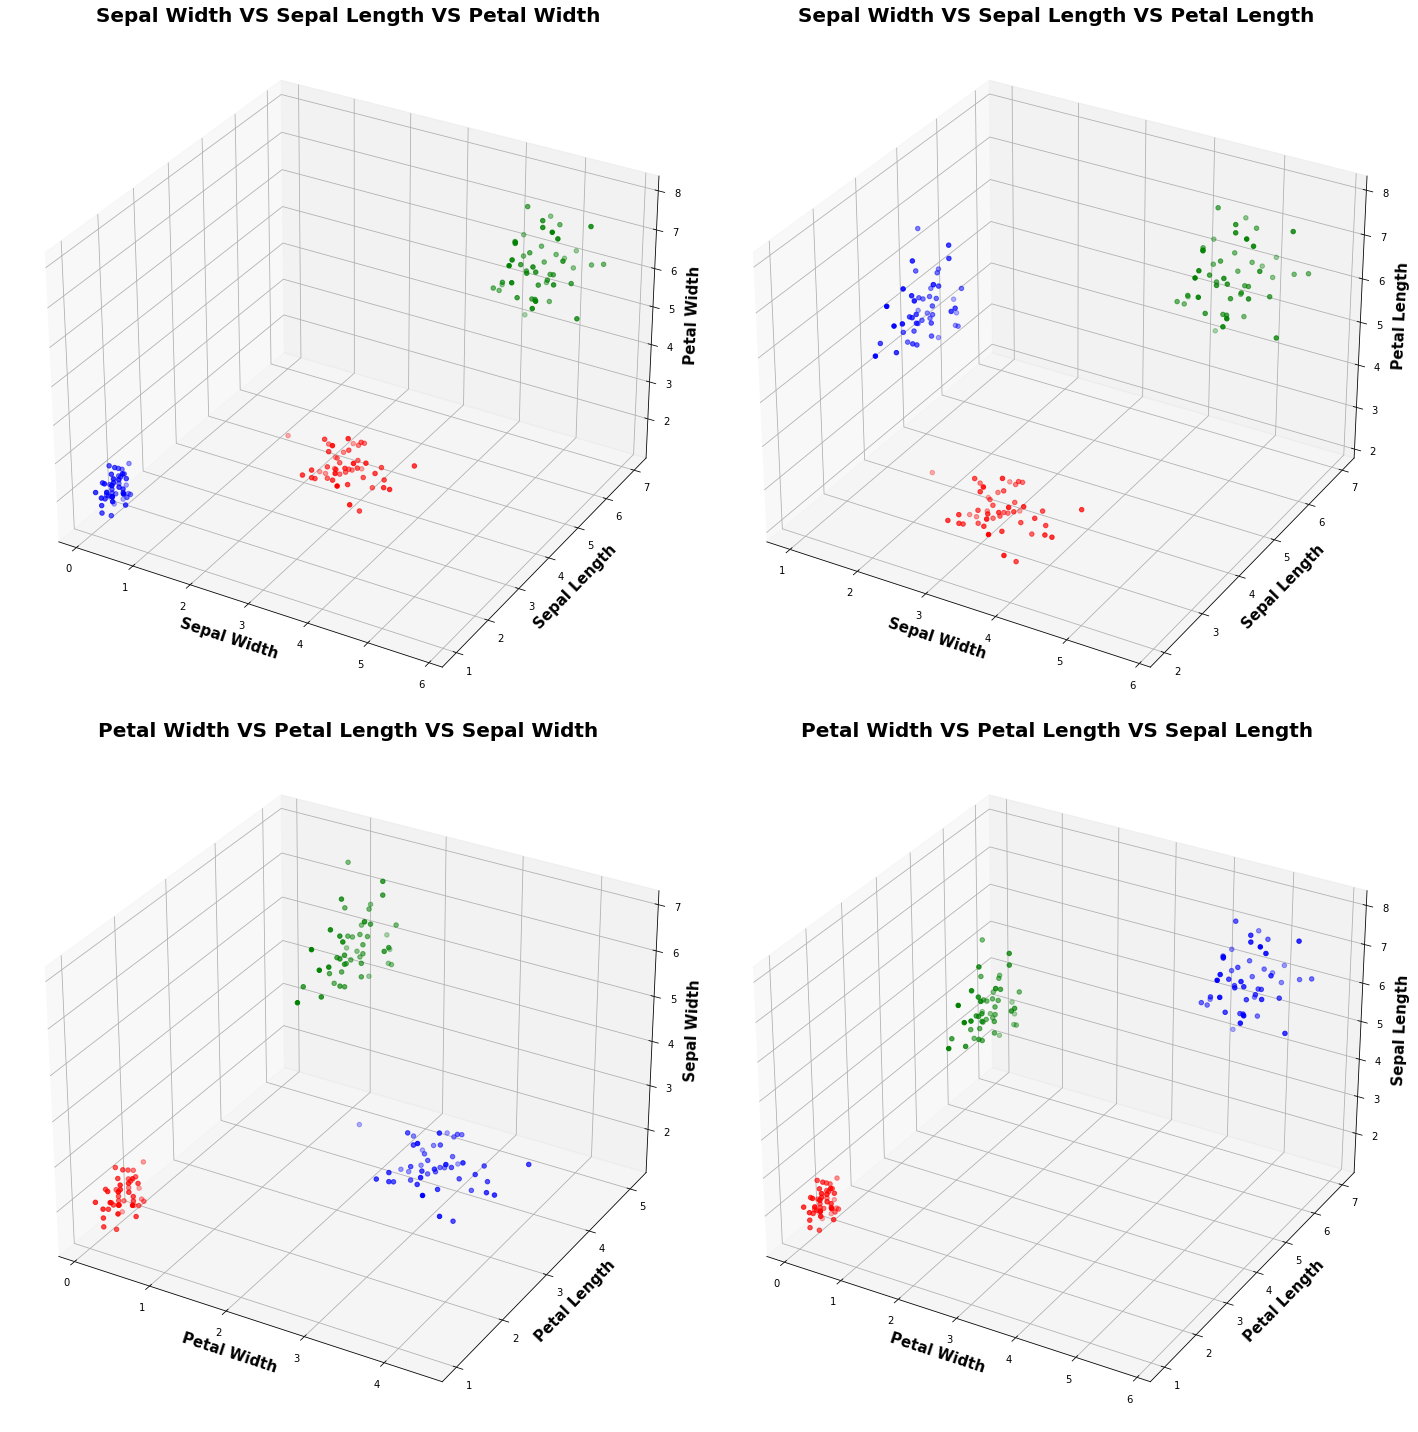

In [23]:
fig = plt.figure(figsize=(20, 20))

def create_3d(feature1, feature2, feature3):
    
    ax.scatter3D((data[data['species'] == 'Iris-setosa'])[feature1], 
                 (data[data['species'] == 'Iris-versicolor'])[feature1], 
                 (data[data['species'] == 'Iris-virginica'])[feature1], 
                 color = 'r')
    
    ax.scatter3D((data[data['species'] == 'Iris-setosa'])[feature2], 
                 (data[data['species'] == 'Iris-versicolor'])[feature2], 
                 (data[data['species'] == 'Iris-virginica'])[feature2], 
                 color = 'g')
    
    ax.scatter3D((data[data['species'] == 'Iris-setosa'])[feature3], 
                 (data[data['species'] == 'Iris-versicolor'])[feature3], 
                 (data[data['species'] == 'Iris-virginica'])[feature3],
                 color = 'b')
    if(feature1 == 'sepal_length'):
        feature1 = 'Sepal Length'
    if(feature1 == 'sepal_width'):
        feature1 = 'Sepal Width'
    if(feature1 == 'petal_length'):
        feature1 = 'Petal Length'
    if(feature1 == 'petal_width'):
        feature1 = 'Petal Width'
    if(feature2 == 'sepal_length'):
        feature2 = 'Sepal Length'
    if(feature2 == 'sepal_width'):
        feature2 = 'Sepal Width'
    if(feature2 == 'petal_length'):
        feature2 = 'Petal Length'
    if(feature2 == 'petal_width'):
        feature2 = 'Petal Width'
    if(feature3 == 'sepal_length'):
        feature3 = 'Sepal Length'
    if(feature3 == 'sepal_width'):
        feature3 = 'Sepal Width'
    if(feature3 == 'petal_length'):
        feature3 = 'Petal Length'
    if(feature3 == 'petal_width'):
        feature3 = 'Petal Width'
        
    plt.title(feature1 + ' VS ' + feature2 + ' VS ' + feature3, fontweight = 'bold', size = 20)
    ax.set_xlabel(feature1, fontweight = 'bold', size = 15)
    ax.set_ylabel(feature2, fontweight = 'bold', size = 15)
    ax.set_zlabel(feature3, fontweight = 'bold', size = 15)
    
ax = fig.add_subplot(2, 2, 1, projection='3d')
create_3d('sepal_width', 'sepal_length', 'petal_width')

ax = fig.add_subplot(2, 2, 2, projection='3d')
create_3d('sepal_width', 'sepal_length', 'petal_length')

ax = fig.add_subplot(2, 2, 3, projection='3d')
create_3d('petal_width', 'petal_length', 'sepal_width')

ax = fig.add_subplot(2, 2, 4, projection='3d')
create_3d('petal_width', 'petal_length', 'sepal_length')

fig.tight_layout()
plt.show()


# Checking Correlations

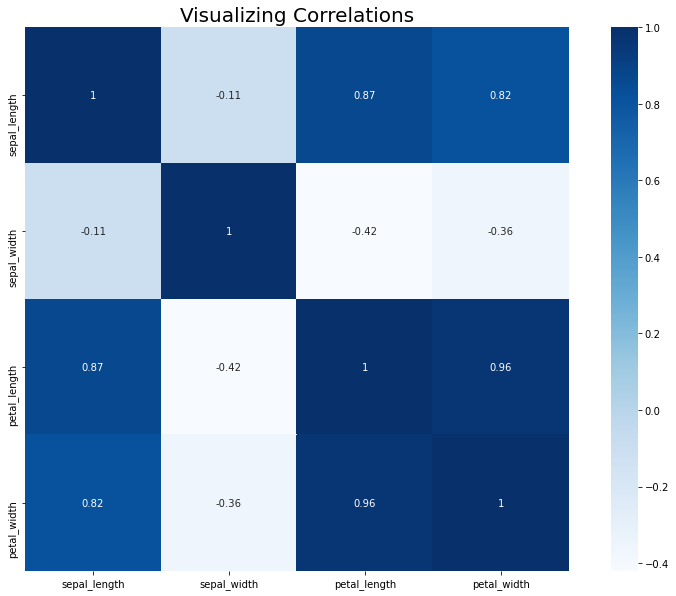

In [24]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(), cmap = 'Blues', square = True, annot = True)
plt.title("Visualizing Correlations", size = 20)
plt.show()

# Logistic Regression

Logistic regression, despite its name, is a classification model rather than regression model. It is a process of modeling the probability of a discrete outcome given input variables.

ML model only handles numeric data.
We have numeric data for all the columns except species.

Replacing iris-setosa as 1, iris-versicolor as 2 and iris-virginica as 3. Since, ML model only accepts only numeric data.

In [25]:
data['species'] = data['species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})

In [26]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


Before I create the multiclass logistic regression model, i will split the data into training and testing dataset.
In oder to do that, i will import train_test_split which I imported earlier from sklearn.

I'm going to give independent parameters like sepal_length,sepal_width,petal_length,petal_width x parameter and dependent atrribute is species which is y parameter.
For training, 70% of the dataset is used and for testing 30% of the dataset is used.
The independent attribute of train and test set is denoted by 'X'.
The dependent attribute of train and test set is denoted by 'y'.

In [27]:
#The output of this data is stored in X_train , X_test , y_train , y_test.
X_train, X_test, y_train, y_test = train_test_split(data[['sepal_length','sepal_width','petal_length','petal_width']],data['species'], test_size=0.3)

In [28]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
25,5.0,3.0,1.6,0.2
114,5.8,2.8,5.1,2.4
82,5.8,2.7,3.9,1.2
24,4.8,3.4,1.9,0.2
86,6.7,3.1,4.7,1.5
...,...,...,...,...
34,4.9,3.1,1.5,0.1
45,4.8,3.0,1.4,0.3
129,7.2,3.0,5.8,1.6
89,5.5,2.5,4.0,1.3


Here, there are 105 rows and 4 columns for training set which consists of independent variables.

In [29]:
y_train 

25     1
114    3
82     2
24     1
86     2
      ..
34     1
45     1
129    3
89     2
148    3
Name: species, Length: 105, dtype: int64

Here, y_train consists of dependent variable 'species' with 105 rows.

In [30]:
from sklearn import linear_model 

mymodel = linear_model.LogisticRegression(max_iter=130) 
mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=130)

We can see that this ML model has run without any erros,now i can use this model to make predictions

In [31]:
mymodel.predict(X_test)

array([1, 3, 3, 1, 3, 3, 2, 1, 2, 3, 3, 2, 1, 1, 3, 2, 3, 1, 3, 3, 3, 2,
       2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 3, 3, 2,
       2], dtype=int64)

The above outputs are the prediction made by the model for the test dataset.

In [32]:
X_test

,sepal_length,sepal_width,petal_length,petal_width
29,4.7,3.2,1.6,0.2
70,5.9,3.2,4.8,1.8
109,7.2,3.6,6.1,2.5
22,4.6,3.6,1.0,0.2
115,6.4,3.2,5.3,2.3
132,6.4,2.8,5.6,2.2
66,5.6,3.0,4.5,1.5
30,4.8,3.1,1.6,0.2
55,5.7,2.8,4.5,1.3
125,7.2,3.2,6.0,1.8




Likewise, the model has predicted the outcome for all the independent attributes.

Here, the model has made predictions but we dont know how accurate it is.

In [33]:
#In order to know the accuracy of the model, i can use model.score and give test datasets as inputs.
mymodel.score(X_test, y_test)

0.9333333333333333

Hence, this shows that my model is 97% accurate.

In [34]:
#I'm going to store predict output in variable called predicted_output
predicted_output = mymodel.predict(X_test)
predicted_output 

array([1, 3, 3, 1, 3, 3, 2, 1, 2, 3, 3, 2, 1, 1, 3, 2, 3, 1, 3, 3, 3, 2,
       2, 3, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 1, 2, 3, 3, 2,
       2], dtype=int64)

It is an array that contains output predicted by the model.

cm is the instance of confusion_matrix class and i have passed two inputs.
y_test is the actual output.
We are creating cm for actual vs predicted output.

In [35]:
cm = confusion_matrix(y_test, predicted_output)
cm 

array([[16,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 14]], dtype=int64)

From the answer, we can see that there is 3 possible outcome that our model can predict.
Hence, we've got 3x3 array.

Text(24.0, 0.5, 'Truth or Actual Value')

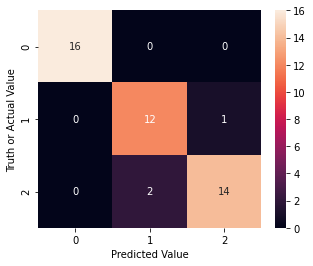

In [36]:
plt.figure(figsize = (5,4))  
sn.heatmap(cm, annot=True)   

plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

Here, in x-axis we have predicted value and in y-axis, we have truth or actual value.


We can see that there is 1 value which is predicted wrong due to which our model is only 97% accurate.